# Crime Data Visualisations – West Midlands (2024–2025)

This notebook builds on the exploratory analysis by creating **visualisations** 
to highlight key crime patterns in the West Midlands.  
The aim is to translate statistical findings into interpretable charts and maps 
that communicate insights clearly.

---

## 1. Crime Trends Over Time
- Line plot of total monthly crime counts (Jun 2024 – Jul 2025).  
- Highlight seasonal peaks (e.g., summer surge, winter dip).  

---

## 2. Crime Type Distribution
- Bar chart of top crime types.  
- Stacked bar chart (crime type × outcome category) to show resolution likelihood.  

---

## 3. Geographic Hotspots
- Bar chart of top 10 LSOAs with highest crime counts.  
- Optional: Heatmap of crime density using latitude/longitude.  

---

## 4. Outcomes Breakdown
- Bar chart of most common outcome categories.  
- Percentage stacked bar chart comparing solved vs unsolved outcomes.  

---

## 5. Seasonal Patterns
- Grouped bar chart: crime type × season.  
- Highlight categories with strong seasonal effects (e.g., burglary lower in summer, shoplifting higher in December).  

---

## 6. Location-Specific Analysis
- Compare crime counts in **supermarkets vs other locations** (visual confirmation of proportional test).  
- Bar chart of top location categories (parking areas, petrol stations, hospitals, etc.).  

---

## 7. Summary of Visual Findings
- Bullet-point recap of insights revealed in visuals.  
- Tie back to EDA and statistical testing results.  

---

📌 **Note**:  
Visualisations serve as the bridge between raw numbers and insights.  
They make patterns and anomalies more intuitive and allow for stronger communication of findings.


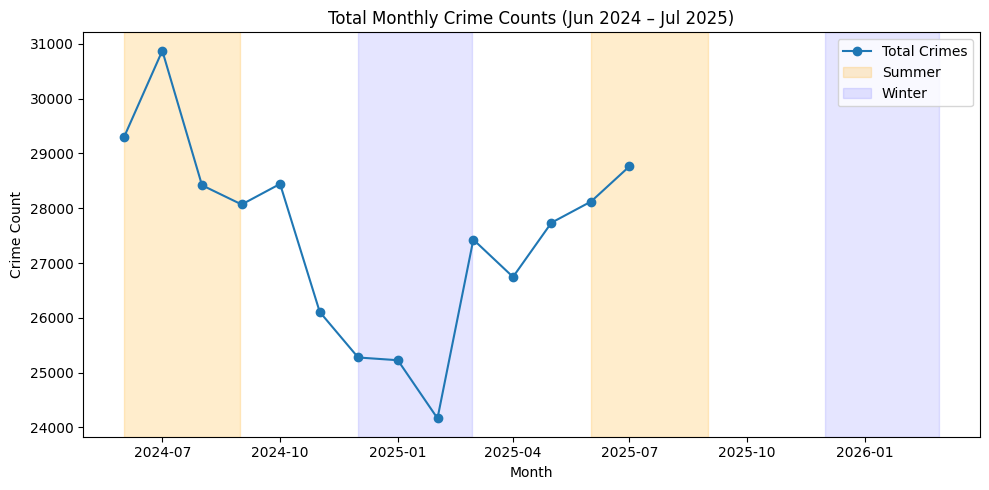

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('../data/processed/cleaned_crime.csv')

# Ensure 'Month' is datetime
df['Month'] = pd.to_datetime(df['Month'])

# Group by month and count crimes
monthly_crime = df.groupby(df['Month'].dt.to_period('M')).size()
monthly_crime.index = monthly_crime.index.to_timestamp()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(monthly_crime.index, monthly_crime.values, marker='o', label='Total Crimes')

# Highlight summer (Jun-Aug) and winter (Dec-Feb) periods
for year in [2024, 2025]:
    # Summer
    plt.axvspan(pd.Timestamp(f'{year}-06-01'), pd.Timestamp(f'{year}-08-31'), color='orange', alpha=0.2, label='Summer' if year == 2024 else "")
    # Winter
    plt.axvspan(pd.Timestamp(f'{year}-12-01'), pd.Timestamp(f'{year+1}-02-28'), color='blue', alpha=0.1, label='Winter' if year == 2024 else "")

plt.title('Total Monthly Crime Counts (Jun 2024 – Jul 2025)')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.legend()
plt.tight_layout()
plt.show()

### Monthly Crime Trends (Jun 2024 – Jul 2025)

This line chart shows the total number of crimes recorded each month.  

Key observations:  
- Crime levels **peak in July 2024 (≈31k incidents)** and again in **July 2025 (≈28.7k incidents)**.  
- A clear **seasonal dip** occurs during the winter months (Dec–Feb), with February 2025 recording the lowest volume (≈24.1k incidents).  
- The shaded bands highlight **summer (orange)** and **winter (blue)** periods, showing strong seasonality that was also confirmed through the ANOVA statistical test (p < 0.05).  

This visual supports the finding that crime volumes are **significantly higher in summer and lower in winter**, reinforcing seasonal crime dynamics in the West Midlands.


C:\Users\Compu\AppData\Local\Temp\ipykernel_16560\773334723.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


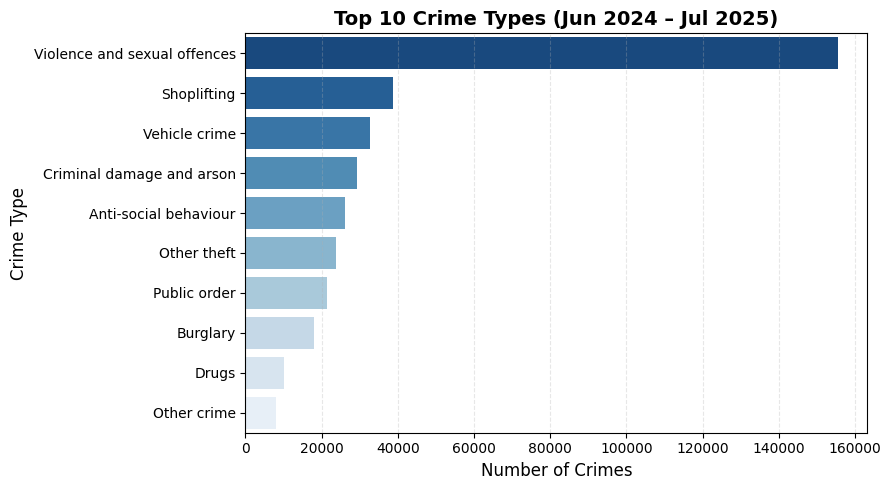

In [2]:
import seaborn as sns

# Get top 10 crime types
top_crimes = df["Crime type"].value_counts().nlargest(10)

plt.figure(figsize=(9, 5))
sns.barplot(
    x=top_crimes.values,
    y=top_crimes.index,
    palette='Blues_r',
    legend=False
)
plt.title('Top 10 Crime Types (Jun 2024 – Jul 2025)', fontsize=14, weight='bold')
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('Crime Type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



The bar chart above highlights the ten most frequently recorded crime types in the West Midlands during the analysis period:

- **Violence and sexual offences** is by far the most prevalent, accounting for over 155,000 incidents.
- **Shoplifting** and **vehicle crime** are the next most common, with 38,741 and 32,797 cases respectively.
- **Criminal damage and arson**, **anti-social behaviour**, and **other theft** also feature prominently, each with over 23,000 incidents.
- **Public order** and **burglary** are significant contributors, while **drugs** and **other crime** round out the top ten.


C:\Users\Compu\AppData\Local\Temp\ipykernel_16560\3805489819.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


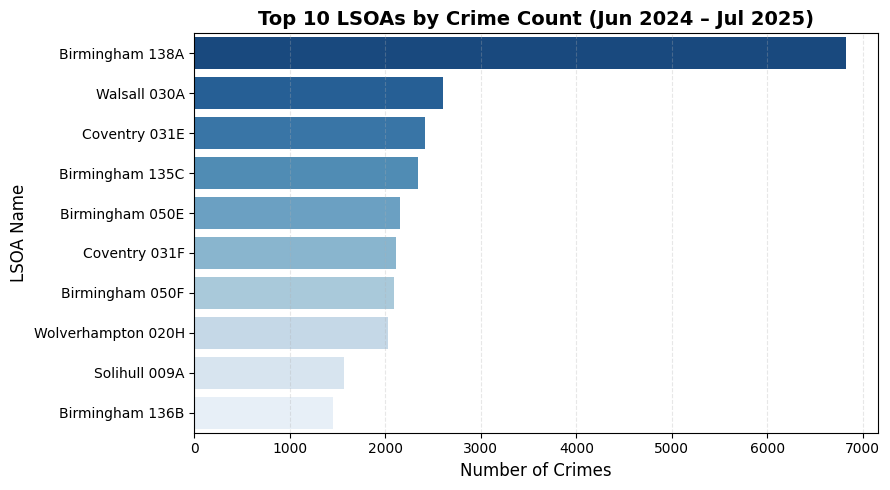

In [3]:
# Get top 10 LSOAs by crime count
top_lsoas = df["LSOA name"].value_counts().nlargest(10)

plt.figure(figsize=(9, 5))
sns.barplot(
    x=top_lsoas.values,
    y=top_lsoas.index,
    palette="Blues_r"
)
plt.title('Top 10 LSOAs by Crime Count (Jun 2024 – Jul 2025)', fontsize=14, weight='bold')
plt.xlabel('Number of Crimes', fontsize=12)
plt.ylabel('LSOA Name', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


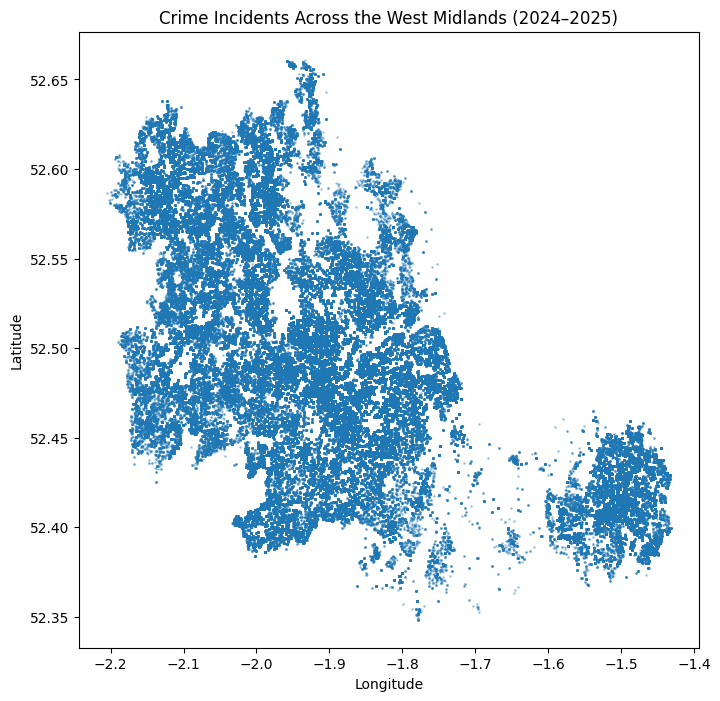

In [4]:
#--- Scatter plot of crime locations ---
plt.figure(figsize=(8,8))
plt.scatter(df["Longitude"], df["Latitude"], s=1, alpha=0.3)
plt.title("Crime Incidents Across the West Midlands (2024–2025)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


### Geographic Hotspots

The analysis of geographic concentration highlights both **specific high-crime LSOAs** 
and the overall geographic spread of incidents.

- **Top 10 LSOAs**: Birmingham 138A dominates with nearly 7,000 crimes, 
  followed by hotspots in Walsall (030A) and Coventry (031E).  
- **Urban clustering**: The scatterplot of latitude and longitude shows that 
  incidents are **densely clustered in urban centres** such as Birmingham, Coventry, and Wolverhampton.  
- **Suburban spread**: While crime is heavily concentrated in cities, there are 
  noticeable clusters in suburban areas such as Solihull.

These findings reinforce the importance of **urban hotspots** in driving overall 
crime volumes and support the allocation of targeted resources to specific LSOAs.


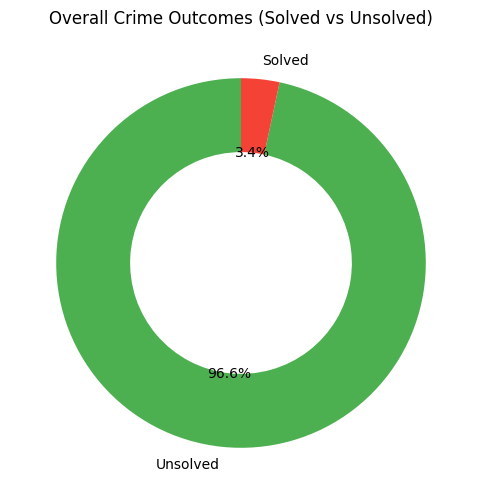

In [5]:
# Create a donut chart of overall crime outcomes

# Simplify outcomes into solved vs unsolved
df["Outcome_Simplified"] = df["Last outcome category"].apply(
    lambda x: "Solved" if x in [
        "Offender given a caution",
        "Suspect charged as part of another case",
        "Local resolution",
        "Formal action is not in the public interest"
    ] else "Unsolved"
)

outcome_counts = df["Outcome_Simplified"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(outcome_counts, labels=outcome_counts.index, autopct="%1.1f%%", 
        startangle=90, colors=["#4CAF50","#F44336"], wedgeprops=dict(width=0.4))
plt.title("Overall Crime Outcomes (Solved vs Unsolved)")
plt.show()


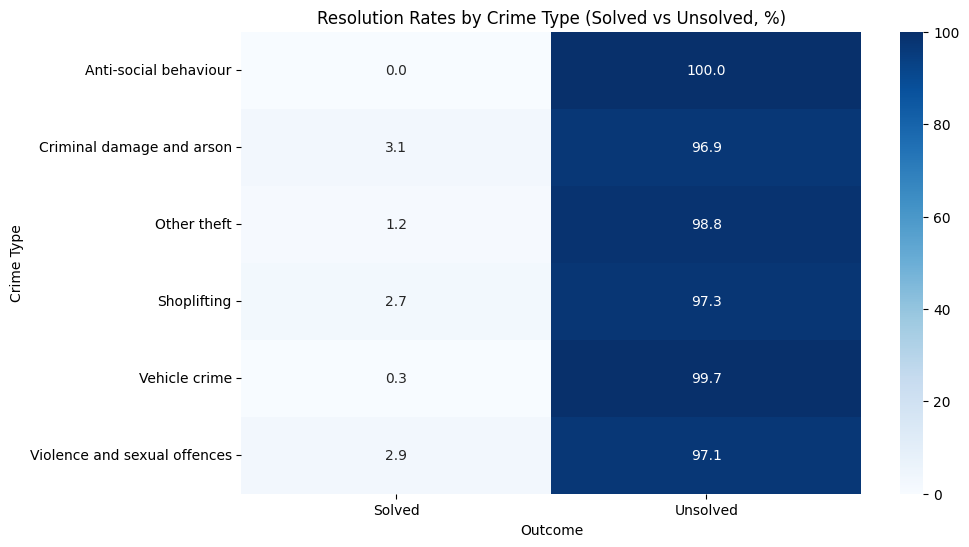

In [6]:
# Create a heatmap of resolution rates by crime type

# Build contingency table for top 6 crime types
top_crimes = df["Crime type"].value_counts().nlargest(6).index
contingency = pd.crosstab(
    df[df["Crime type"].isin(top_crimes)]["Crime type"],
    df["Outcome_Simplified"]
)

# Convert to proportions for better comparison
contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100

plt.figure(figsize=(10,6))
sns.heatmap(contingency_pct, annot=True, fmt=".1f", cmap="Blues")
plt.title("Resolution Rates by Crime Type (Solved vs Unsolved, %)")
plt.ylabel("Crime Type")
plt.xlabel("Outcome")
plt.show()


### Outcomes Breakdown

Crime outcome analysis reveals a striking imbalance between solved and unsolved cases:

- **Overall picture**: The donut chart shows that only **3.4% of crimes are solved**, while 
  **96.6% remain unsolved**.  
- **By crime type**: The heatmap demonstrates that resolution rates are consistently low 
  across categories. Vehicle crime has the lowest solve rate (~0.3%), while violent and 
  sexual offences also remain largely unresolved (~97% unsolved).  

These visuals align with the chi-square test results, which confirmed a statistically 
significant association between crime type and outcome (p < 0.05). The findings point to 
systemic challenges in resolving incidents, particularly high-volume crimes such as 
violence and vehicle-related offences.


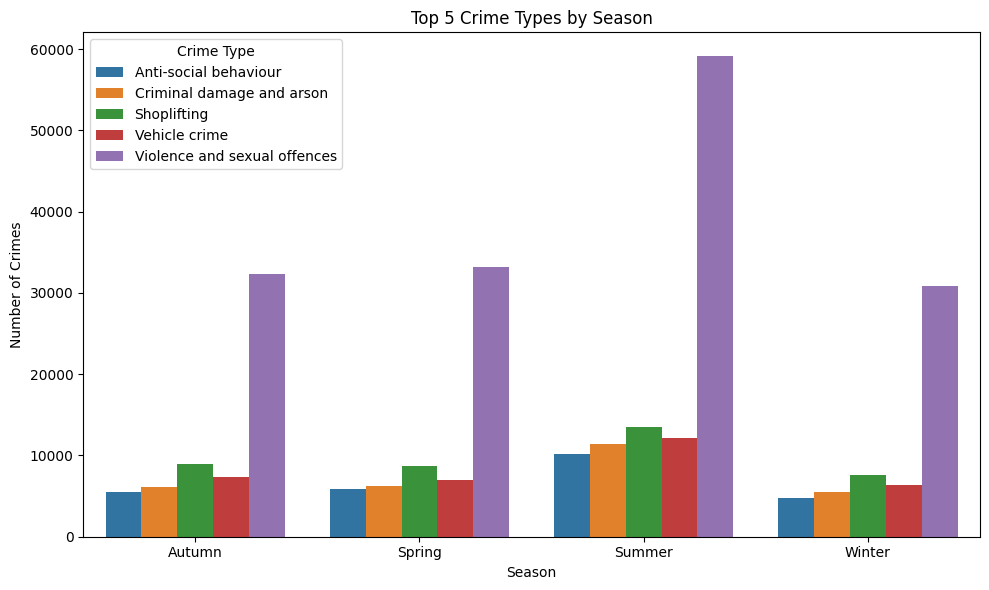

In [7]:
# Create a seasonal bar chart of crime types    

# Aggregate by season and crime type
season_crime = df.groupby(["Season", "Crime type"]).size().reset_index(name="Count")

# Focus on top 5 crime types to avoid clutter
top5_crimes = df["Crime type"].value_counts().nlargest(5).index
season_crime_top5 = season_crime[season_crime["Crime type"].isin(top5_crimes)]

plt.figure(figsize=(10,6))
sns.barplot(data=season_crime_top5, x="Season", y="Count", hue="Crime type")
plt.title("Top 5 Crime Types by Season")
plt.ylabel("Number of Crimes")
plt.xlabel("Season")
plt.legend(title="Crime Type")
plt.tight_layout()
plt.show()


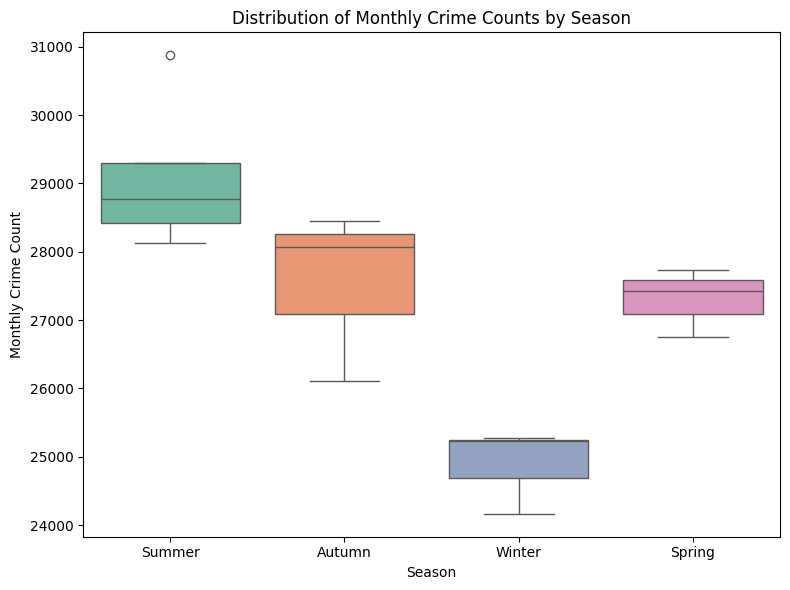

In [8]:
# Create monthly_counts DataFrame: each row is a month, with its total crime count and season
monthly_counts = (
	df.groupby(["Month", "Season"])
	.size()
	.reset_index(name="Count")
)

plt.figure(figsize=(8,6))
sns.boxplot(data=monthly_counts, x="Season", y="Count", hue="Season", palette="Set2", legend=False)
plt.title("Distribution of Monthly Crime Counts by Season")
plt.ylabel("Monthly Crime Count")
plt.xlabel("Season")
plt.tight_layout()
plt.show()


## Seasonal Crime Patterns

To better understand how crime varies throughout the year, we explored the **distribution of monthly crime counts by season**.

- The **boxplot** highlights that:
  - **Summer** consistently shows the highest crime counts, with a noticeable outlier in July 2024.  
  - **Winter** has the lowest overall crime levels, indicating a seasonal dip.  
  - **Spring** and **Autumn** fall between the two extremes, but Autumn demonstrates more variability.  

- The **grouped bar chart** breaks down the **top 5 crime types across seasons**:
  - **Violence and sexual offences** remain the most prevalent in every season, with a striking spike in Summer.  
  - **Shoplifting and vehicle crime** also show seasonal peaks, particularly in Summer months.  
  - Crimes such as **anti-social behaviour** rise in warmer months, suggesting environmental and social factors play a role.  



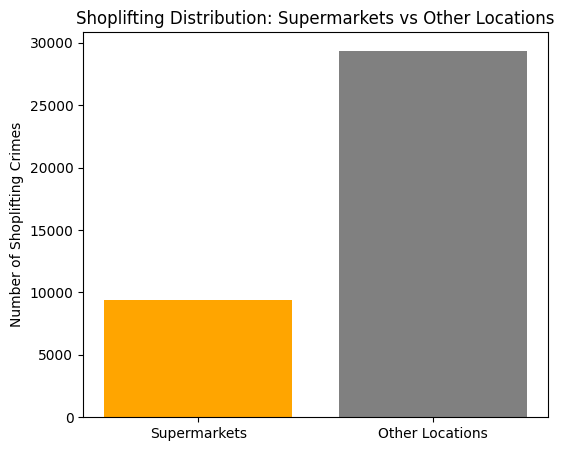

In [9]:
import matplotlib.pyplot as plt

# Counts
shop_super = len(df[(df["Crime type"]=="Shoplifting") & (df["Location"].str.contains("Supermarket", case=False))])
shop_other = len(df[(df["Crime type"]=="Shoplifting") & (~df["Location"].str.contains("Supermarket", case=False))])

plt.figure(figsize=(6,5))
plt.bar(["Supermarkets", "Other Locations"], [shop_super, shop_other], color=["orange","grey"])
plt.title("Shoplifting Distribution: Supermarkets vs Other Locations")
plt.ylabel("Number of Shoplifting Crimes")
plt.show()


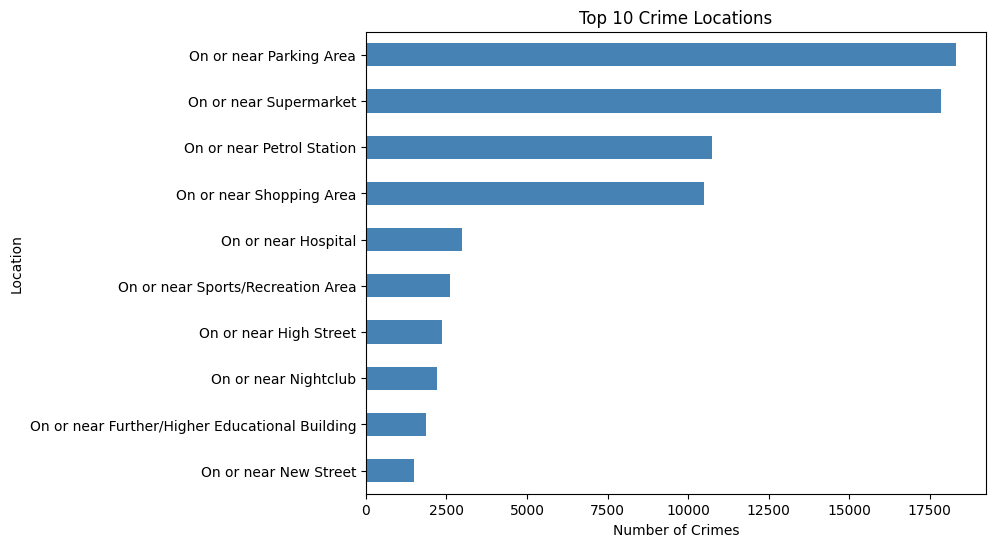

In [10]:
top_locations = df["Location"].value_counts().head(10)

plt.figure(figsize=(8,6))
top_locations.plot(kind="barh", color="steelblue")
plt.title("Top 10 Crime Locations")
plt.xlabel("Number of Crimes")
plt.ylabel("Location")
plt.gca().invert_yaxis()  # Highest at top
plt.show()


## Summary of Visual Findings

The visual analysis reinforced key patterns uncovered during EDA and statistical testing:

- **Temporal Trends**: Crime peaks in Summer months (notably July), while Winter shows the lowest volumes.  
- **Crime Types**: Violence and sexual offences dominate, followed by shoplifting and vehicle crime.  
- **Geographic Hotspots**: Concentrated in Birmingham (especially LSOAs like Birmingham 138A), Walsall, and Coventry.  
- **Crime Outcomes**: Vast majority of crimes remain unsolved (>95%), with little variation across crime types.  
- **Seasonality**: Summer spikes highlight environmental/social influences on crime behaviour.  
- **Location-Specific**: Shoplifting is disproportionately concentrated in supermarkets, confirmed by statistical testing.  

**Overall Insight:**  
Visuals confirm that crime in the West Midlands is shaped by **time, place, and type** — with strong seasonal and location-specific drivers influencing crime dynamics.
